In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
with open('mlp_data.txt', 'r') as file:
    lines = file.readlines()

In [26]:
x1_mlp = []
x2_mlp = []
y_mlp = []

for line in lines:
    x1, x2, y = map(float, line.split())
    
    x1_mlp.append(x1)
    x2_mlp.append(x2)
    y_mlp.append(y)
    
x_train = np.array(list(zip(x1_mlp, x2_mlp)))

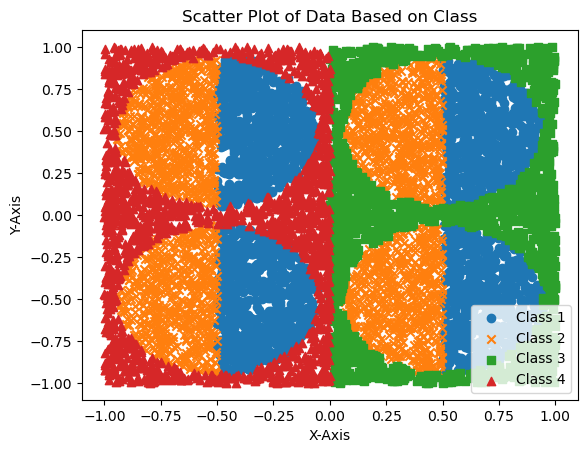

In [27]:
# Separate data based on class
class_1_indices = np.where(np.array(y_mlp) == 1)
class_2_indices = np.where(np.array(y_mlp) == 2)
class_3_indices = np.where(np.array(y_mlp) == 3)
class_4_indices = np.where(np.array(y_mlp) == 4)

plt.scatter(x_train[class_1_indices, 0], x_train[class_1_indices, 1], label='Class 1', marker='o')
plt.scatter(x_train[class_2_indices, 0], x_train[class_2_indices, 1], label='Class 2', marker='x')
plt.scatter(x_train[class_3_indices, 0], x_train[class_3_indices, 1], label='Class 3', marker='s')
plt.scatter(x_train[class_4_indices, 0], x_train[class_4_indices, 1], label='Class 4', marker='^')

plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.title('Scatter Plot of Data Based on Class')
plt.show()

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
y = []
for i in range(len(y_mlp)):
    if y_mlp[i] == 1:
        y.append([1, 0, 0, 0])
    elif y_mlp[i] == 2:
        y.append([0, 1, 0, 0])
    elif y_mlp[i] == 3:
        y.append([0, 0, 1, 0])
    elif y_mlp[i] == 4:
        y.append([0, 0, 0, 1])
y_mlp = np.array(y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_mlp, test_size=0.2)

In [31]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=3, max_iter=1000, 
                    learning_rate_init=0.001, 
                    batch_size=1, solver='sgd',
                    activation='relu')
clf.fit(x_train, y_train)

MLPClassifier(batch_size=1, hidden_layer_sizes=3, max_iter=1000, random_state=1,
              solver='sgd')

In [32]:
y_pred = clf.predict(x_test)
epsilon = 1e-15
loss = -np.sum(y_test * np.log(y_pred + epsilon))

num_samples = len(y_test)
normalized_loss = loss / num_samples

print("Categorical Crossentropy Loss:", normalized_loss)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Categorical Crossentropy Loss: 29.617000758635914
Accuracy:  0.0825


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = clf_rf.predict(x_test)
epsilon = 1e-15
loss = -np.sum(y_test * np.log(y_pred + epsilon))

num_samples = len(y_test)
normalized_loss = loss / num_samples

print("Categorical Crossentropy Loss:", normalized_loss)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Categorical Crossentropy Loss: 0.9066428803664044
Accuracy:  0.97375


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [38]:
train_loader = DataLoader(TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train)), batch_size=1, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test)), batch_size=1, shuffle=False)

In [55]:
# Define the MLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, h1, h2, h3, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, output_size)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        x = self.tanh(x)
        x = self.fc4(x)
        x = self.tanh(x)
        x = self.softmax(x)
        return x

In [56]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    
    for epoch in range(num_epochs):
        total_loss = 0.0  # Initialize total loss for the epoch
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()  # Accumulate the loss
        average_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.8f}')

In [57]:
def test_model(model, test_loader, criterion):
    model.eval()
    total_correct = 0
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            total_loss += criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            labels = torch.argmax(labels, dim=1)
            total_correct += (predicted == labels).sum().item()
            

    print("Test samples: ", len(test_loader))
    print("Total correct: ", total_correct)
    accuracy = total_correct / len(test_loader)
    print(f'Test Accuracy: {accuracy:.8f}')
    print(f'Test loss: {total_loss / len(test_loader)}')

In [58]:
input_size = 2
output_size = 4
h1 = 32
h2 = 16
h3 = 8
learning_rate = 0.001

In [59]:
model = SimpleMLP(input_size, h1, h2, h3, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [60]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=100)

Epoch [1/100], Average Loss: 1.38711389
Epoch [2/100], Average Loss: 1.37515769
Epoch [3/100], Average Loss: 1.36446074
Epoch [4/100], Average Loss: 1.35477742
Epoch [5/100], Average Loss: 1.34642283
Epoch [6/100], Average Loss: 1.34010434
Epoch [7/100], Average Loss: 1.33589301
Epoch [8/100], Average Loss: 1.33275275
Epoch [9/100], Average Loss: 1.32882237
Epoch [10/100], Average Loss: 1.32271579
Epoch [11/100], Average Loss: 1.31546117
Epoch [12/100], Average Loss: 1.30864419
Epoch [13/100], Average Loss: 1.30288710
Epoch [14/100], Average Loss: 1.29816322
Epoch [15/100], Average Loss: 1.29433518
Epoch [16/100], Average Loss: 1.29112719
Epoch [17/100], Average Loss: 1.28840654
Epoch [18/100], Average Loss: 1.28610289
Epoch [19/100], Average Loss: 1.28402445
Epoch [20/100], Average Loss: 1.28224094
Epoch [21/100], Average Loss: 1.28057166
Epoch [22/100], Average Loss: 1.27906855
Epoch [23/100], Average Loss: 1.27765655
Epoch [24/100], Average Loss: 1.27633170
Epoch [25/100], Average L

In [61]:
# Test the model
test_model(model, test_loader, criterion)

Test samples:  1600
Total correct:  729
Test Accuracy: 0.45562500
Test loss: 1.2514923810958862
